<a href="https://colab.research.google.com/github/cnserge/corpus/blob/main/QWKappa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os # to make use of commands that are internal to the operating system (os), e.g. dealing with copying files or getting directory paths
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix # instructions on how to install sklearn.metrics: https://scikit-learn.org/stable/install.html
from sklearn.metrics import cohen_kappa_score
import itertools
import matplotlib.pyplot as plt
import random as random

In [7]:
# If you created a csv-file (when downloaded from google spreadsheets this is by default a comma-separated table with "" as quote [i.e. string] markers. Change sep and quote if needed)
df = pd.read_csv("/content/sample_data/Cleft_data_for_annotation - Sheet1-2.csv")

In [8]:

df = df.iloc[0:32] # this line subsets the dataframe to the rows that you annotated (currently all clefts are selected).
# Replace the row numbers by your row numbers MINUS 1 (the first row has index 0)
# Note that when importing the dataframe, a separate row index was added different from the nr-column.
# For this assignment this is the most practical solution, but the nr-column is important to be able to recreate the order of appearance of the data in the corpus.

print(df.head) # print your dataframe for manual inspection in case a variable is not read correctly
rater1 = df['generalization_annotator1'].to_numpy() # change the names of the rater to the column header under which you did your annotations (e.g. sentiment_annotator1)
rater2 = df['generalization_annotator2'].to_numpy()


<bound method NDFrame.head of      nr                                     previous_turns speaker_id  \
0    30  > <tr> <td valign="top">Arthur (PS03S) </td> <...      PS03T   
1    45  > <td valign="top">Audrey (PS1A9) </td> <td> [...      PS1A9   
2    48  ?<br></td> </tr> <tr> <td valign="top">Terri (...      PS03X   
3    56  valign="top">Terri (PS03X) </td> <td> [2421] W...      PS03Y   
4    59  actually opened <br></td> </tr> <tr> <td valig...   KBDPSUNK   
5    76  > <tr> <td valign="top">Hugh (PS03Y) </td> <td...      PS03W   
6    78  > </tr> <tr> <td valign="top">Sally (PS04H) </...      PS04H   
7   104  ... on one of the panels!<br></td> </tr> <tr> ...      PS04Y   
8   114                                            #ERROR!      PS04Y   
9   127  being nice [...] <br></td> </tr> <tr> <td vali...      PS04Y   
10  134  > <tr> <td valign="top">Dave (PS04V) </td> <td...      PS04V   
11  136  [12371] Sara ?<br></td> </tr> <tr> <td valign=...      PS04U   
12  140  to you mate.

In [20]:
rater1 = [
    'specific', 'specific', 'specific', 'specific', 'general', 'specific',
    'specific', 'specific', 'specific', 'general', 'specific', 'specific',
    'general', 'specific', 'specific', 'specific', 'specific', 'general',
    'specific', 'specific', 'specific', 'specific', 'specific', 'general',
    'specific', 'specific', 'specific', 'specific', 'general', 'specific',
    'specific', 'unclear'
]

rater2 = [
    'specific', 'specific', 'specific', 'specific', 'general', 'specific',
    'specific', 'specific', 'specific', 'general', 'specific', 'specific',
    'general', 'specific', 'specific', 'specific', 'specific', 'general',
    'specific', 'specific', 'specific', 'specific', 'specific', 'general',
    'specific', 'specific', 'specific', 'specific', 'general', 'specific',
    'specific', 'specific'
]


Print the Cohen's kappa agreement score (-1 = complete disagreement; 0 = random/chance agreement; 1 = full agreement)

In [18]:
print("Cohen's kappa = " + str(cohen_kappa_score(rater1, rater2, labels=None, weights='quadratic', sample_weight=None)))

Cohen's kappa = 1.0


Create and plot non-normalized confusion matrix. Make sure to change the classes to the values of your category.

Normalized confusion matrix


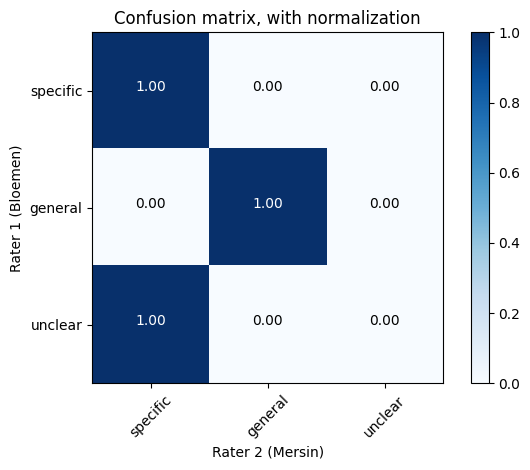

In [23]:
classes = ['specific','general','unclear'] # change the names of these classes to the values of your sentiment, generalization or hedging category)
# thank you https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization') # change to 'without normalization' if you calculate the confusion matrix without
                                                        # normalization (i.e. just want to see the raw numbers)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Rater 1 (Bloemen)') # replace X & Y by your respective names
    plt.xlabel('Rater 2 (Mersin)')
    plt.tight_layout()

cnf_matrix = confusion_matrix(rater1, rater2,labels=['specific','general','unclear'],)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['specific','general','unclear'],
                      title='Confusion matrix, with normalization')

Save your plot as a file (will be in the working directory unless specified differently)

In [15]:
plt.savefig('confusionmatrix.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>